In [1]:
!pip install opencv-python mediapipe torch torchvision torchaudio numpy matplotlib pandas

Vidéos détectées (8):
 • C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid10.avi
 • C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid11.avi
 • C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid12.avi
 • C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid13.avi
 • C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid5.avi
 • C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid6.avi
 • C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid7.avi
 • C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid8.avi
DeepPhysEnhanced loaded from: DeepPhysEnhancedReLu.py
Data ready: torch.Size([18530, 3, 36, 36]) torch.Size([18530, 3, 36, 36]) torch.Size([18530, 2, 36, 36]) torch.Size([18530])
Split (par vidéo) → n_videos=8 | TrainV=5 | ValV=1 | TestV=2
Samples → Train: 11441 | Val: 2299 | Test: 4790 (N=18530)
Vidéos par partition

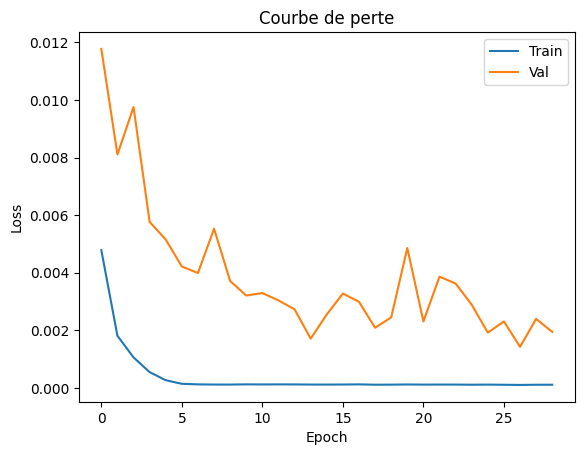

✅ Test — Loss: 0.004768
✅ Modèle sauvegardé: checkpoints\deepphys_enhanced_last.pt
✅ Poids (state_dict) sauvegardés: checkpoints\deepphys_enhanced_weights.pth


C:\Users\Talotra\AppData\Local\Temp\ipykernel_29644\574862600.py:265: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "created_at": datetime.utcnow().isoformat() + "Z",


 Metrics summary:
Train: N=11441 | MAE=0.004419 | RMSE=0.005656 | PearsonR=0.9975 | SNR(dB)=37.431
Val: N=2299 | MAE=0.042856 | RMSE=0.044132 | PearsonR=0.9242 | SNR(dB)=20.759
Test: N=4790 | MAE=0.056115 | RMSE=0.069051 | PearsonR=0.8786 | SNR(dB)=17.124
 Metrics saved to metrics_summary.csv
C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid10.avi → 78.6 BPM
C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid11.avi → 54.6 BPM
C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid12.avi → 46.8 BPM
C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid13.avi → 51.5 BPM
C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid5.avi → 70.7 BPM
C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid6.avi → 79.4 BPM
C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vid7.avi → 42.3 BPM
C:\Users\Talotra\Downloads\DATASET_1\Test\DeepphysEnhancedReLu\videos\vi

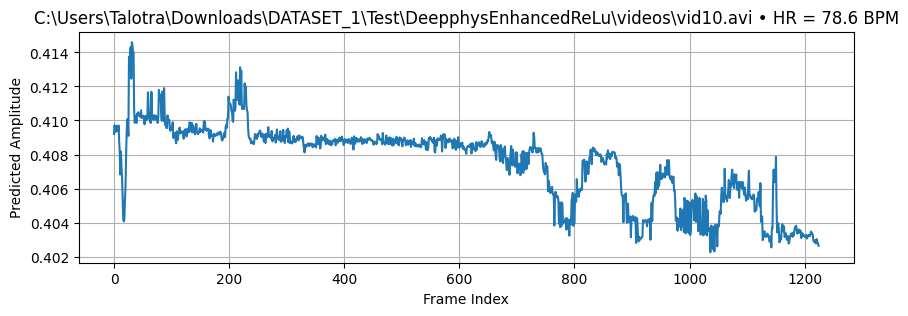

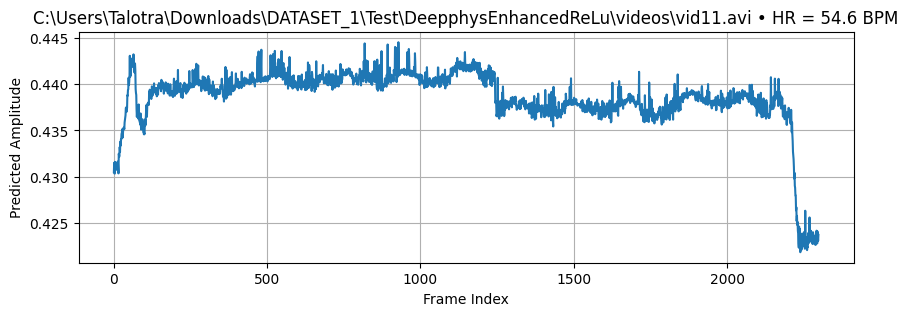

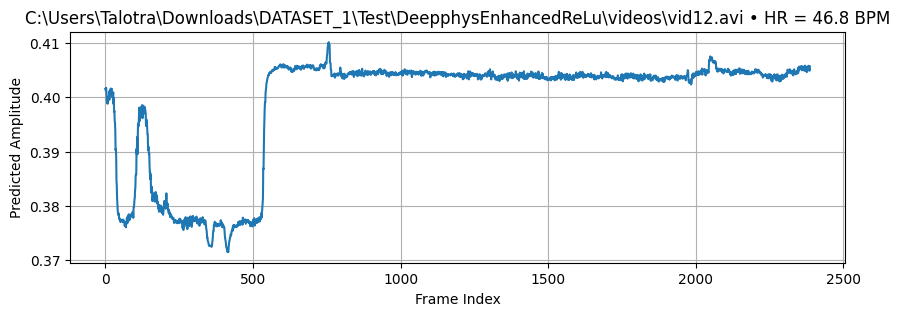

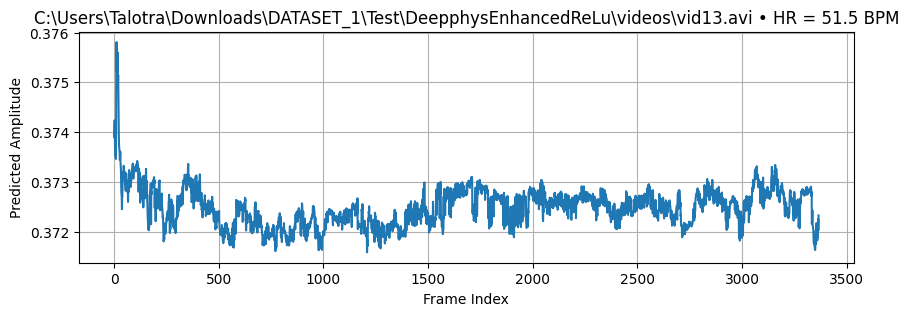

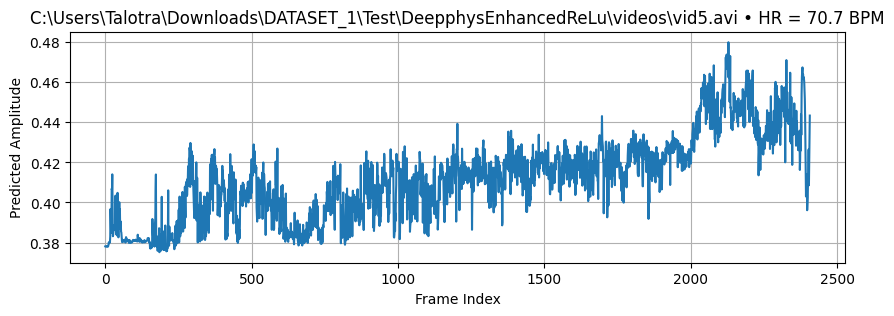

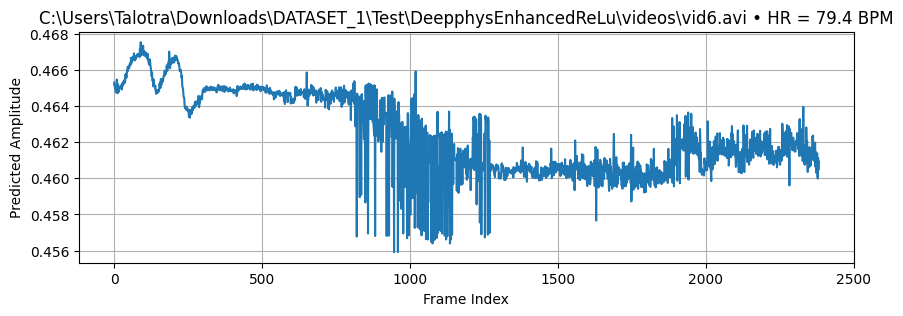

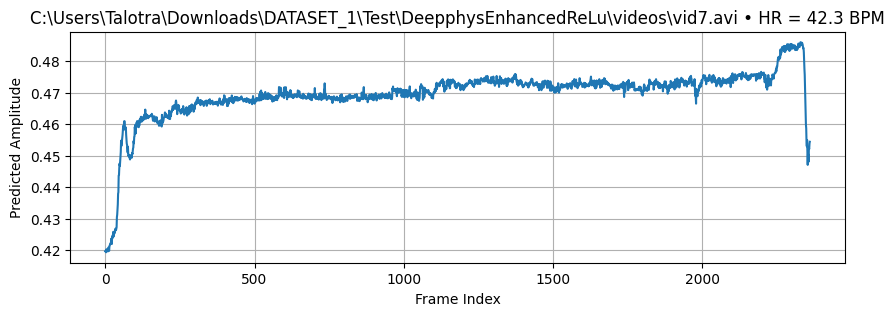

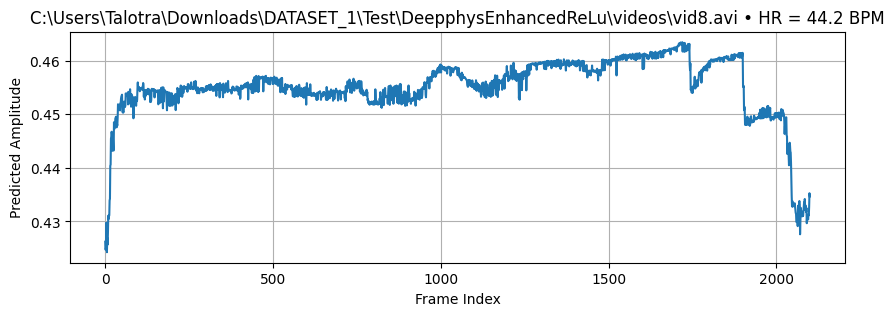


✅ All BPMs have been saved to bpm_results.csv


,video_name,estimated_bpm,predicted_signal
0,C:\Users\Talotra\Downloads\DATASET_1\Test\Deep...,78.642613,"[0.4092063903808594, 0.40971827507019043, 0.40..."
1,C:\Users\Talotra\Downloads\DATASET_1\Test\Deep...,54.624803,"[0.4305090308189392, 0.43151941895484924, 0.43..."
2,C:\Users\Talotra\Downloads\DATASET_1\Test\Deep...,46.845398,"[0.4015616476535797, 0.40148264169692993, 0.40..."
3,C:\Users\Talotra\Downloads\DATASET_1\Test\Deep...,51.542445,"[0.3739369511604309, 0.3738960027694702, 0.374..."
4,C:\Users\Talotra\Downloads\DATASET_1\Test\Deep...,70.726914,"[0.37804776430130005, 0.3780047297477722, 0.37..."
5,C:\Users\Talotra\Downloads\DATASET_1\Test\Deep...,79.443236,"[0.465297132730484, 0.46515846252441406, 0.465..."
6,C:\Users\Talotra\Downloads\DATASET_1\Test\Deep...,42.260828,"[0.4197666347026825, 0.41987913846969604, 0.41..."
7,C:\Users\Talotra\Downloads\DATASET_1\Test\Deep...,44.215415,"[0.42622479796409607, 0.4247340261936188, 0.42..."


In [2]:
# ------------------------------------------------------------
# 1) Input parameters:
# ------------------------------------------------------------
from pathlib import Path
RAW_PATH = "./videos"  # folder containing multiple videos OR a single file
ALLOWED_EXTS = (".avi", ".mp4")

p = Path(RAW_PATH).expanduser().resolve()
if not p.exists():
    raise FileNotFoundError(f"Path not found: {p}")

if p.is_dir():
    video_paths = [
        str(fp)
        for fp in sorted(p.iterdir())
        if fp.is_file() and fp.suffix.lower() in {ext.lower() for ext in ALLOWED_EXTS}
    ]
elif p.is_file():
    if p.suffix.lower() not in {ext.lower() for ext in ALLOWED_EXTS}:
        raise ValueError(f"Unsupported extension: {p.suffix}. Expected: {ALLOWED_EXTS}")
    video_paths = [str(p)]
else:
    raise ValueError(f"Unsupported path type: {p}")

if not video_paths:
    raise FileNotFoundError(f"No valid videos found in: {p}")

print(f"Detected videos ({len(video_paths)}):")
for vp in video_paths:
    print(" •", vp)


video_files = video_paths

# 2. Import your DeepPhysEnhanced class from path
model_file = "DeepPhysEnhancedReLu.py"  # path to your class file
import importlib.util, sys
spec = importlib.util.spec_from_file_location("DeepPhysEnhanced", model_file)
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)
from types import ModuleType
DeepPhysEnhanced = module.DeepPhysEnhanced
import torch, torch.nn.functional as F

print("DeepPhysEnhanced loaded from:", model_file)

# 3. Preprocessing: face detection + build raw, diff, posgreen inputs and green_avg target
import cv2, mediapipe as mp
import numpy as np
from tqdm import tqdm

# Initialize MediaPipe FaceDetection
mp_fd = mp.solutions.face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

# Containers
X_raw, X_diff, X_posgreen = [], [], []
y_target = []

sample_video_ids = []

# Loop through all videos
for vid_idx, vid in enumerate(video_files):
    cap = cv2.VideoCapture(vid)
    success, frame = cap.read()
    prev_face = None
    while success:
        # 1. Detection & crop
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = mp_fd.process(rgb)
        h, w, _ = frame.shape
        if res.detections:
            d = res.detections[0].location_data.relative_bounding_box
            x0, y0 = int(d.xmin * w), int(d.ymin * h)
            bw, bh = int(d.width * w), int(d.height * h)
            cx, cy = x0 + bw // 2, y0 + bh // 2
            sz = int(1.6 * max(bw, bh))
            x1, y1 = max(0, cx - sz // 2), max(0, cy - sz // 2)
            x2, y2 = min(w, x1 + sz), min(h, y1 + sz)
            face = frame[y1:y2, x1:x2]
        else:
            face = frame

        # 2. Resize & normalize
        face = cv2.resize(face, (36, 36)).astype(np.float32) / 255.0

        # 3. If we already have a previous frame, compute diff & posgreen
        if prev_face is not None:
            diff = face - prev_face

            # 4. Compute green_avg & pos_avg (simple POS proxy)
            green_avg = float(face[:, :, 1].mean())
            pos_map = face[:, :, 0] * 3 - face[:, :, 1] * 2  # proxy POS channel
            pos_avg = float(pos_map.mean())

            # 5. Build posgreen input (2 constant 36×36 channels)
            ch_g = np.full((36, 36), green_avg, dtype=np.float32)
            ch_p = np.full((36, 36), pos_avg, dtype=np.float32)
            posgreen = np.stack([ch_p, ch_g], axis=2)  # shape (36, 36, 2)

            # 6. Store in lists (in C×H×W for PyTorch)
            X_raw.append(torch.tensor(face).permute(2, 0, 1))
            X_diff.append(torch.tensor(diff).permute(2, 0, 1))
            X_posgreen.append(torch.tensor(posgreen).permute(2, 0, 1))

            y_target.append(green_avg)
            sample_video_ids.append(vid_idx)  # why: video tracing → sample

        prev_face = face.copy()
        success, frame = cap.read()
    cap.release()

# Convert to tensors
X_raw      = torch.stack(X_raw)        # [N, 3, 36, 36]
X_diff     = torch.stack(X_diff)       # [N, 3, 36, 36]
X_posgreen = torch.stack(X_posgreen)   # [N, 2, 36, 36]
y_target   = torch.tensor(y_target)    # [N]

print("Data ready:", X_raw.shape, X_diff.shape, X_posgreen.shape, y_target.shape)

# 4. Training the DeepPhysEnhanced model (split BY VIDEO: 0.70/0.20/0.10)
from torch.utils.data import TensorDataset, DataLoader, Subset


ds = TensorDataset(X_diff, X_raw, X_posgreen, y_target)
N = len(ds)

# --- BY VIDEO split (deterministic) ---
n_videos = len(video_files)
if n_videos == 0:
    raise RuntimeError("No videos to split.")

_gen = torch.Generator().manual_seed(42)
perm_vid = torch.randperm(n_videos, generator=_gen).tolist()

train_v = int(0.70 * n_videos)
val_v   = int(0.20 * n_videos)
# allocate the remainder to test
test_v  = n_videos - train_v - val_v

train_vid_ids = set(perm_vid[:train_v])
val_vid_ids   = set(perm_vid[train_v:train_v + val_v])
test_vid_ids  = set(perm_vid[train_v + val_v:])

# sample indices per partition
all_idx = list(range(N))
train_idx = [i for i in all_idx if sample_video_ids[i] in train_vid_ids]
val_idx   = [i for i in all_idx if sample_video_ids[i] in val_vid_ids]
test_idx  = [i for i in all_idx if sample_video_ids[i] in test_vid_ids]

train_ds, val_ds, test_ds = Subset(ds, train_idx), Subset(ds, val_idx), Subset(ds, test_idx)

print(f"Split (by video) → n_videos={n_videos} | TrainV={len(train_vid_ids)} | ValV={len(val_vid_ids)} | TestV={len(test_vid_ids)}")
print(f"Samples → Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)} (N={N})")

# -- Listing videos by partition (each video in ONLY one partition)
train_vids = [video_files[v] for v in sorted(train_vid_ids)]
val_vids   = [video_files[v] for v in sorted(val_vid_ids)]
test_vids  = [video_files[v] for v in sorted(test_vid_ids)]

print("Videos by partition:")
print(f"Train ({len(train_vids)}):")
for v in train_vids: print(" •", v)
print(f"Validation ({len(val_vids)}):")
for v in val_vids: print(" •", v)
print(f"Test ({len(test_vids)}):")
for v in test_vids: print(" •", v)

# Loaders
loader      = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader  = DataLoader(val_ds,   batch_size=32, shuffle=False)
test_loader = DataLoader(test_ds,  batch_size=32, shuffle=False)

model     = DeepPhysEnhanced()  # instantiate model
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

loss_history = []
val_loss_history = []

model.train()
for epoch in range(1, 30):
    total_loss = 0.0
    model.train()
    for d, r, p, y in loader:
        d, r, p, y = d.to(device), r.to(device), p.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(d, r, p).squeeze()
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * d.size(0)
    train_epoch_loss = total_loss / max(1, len(train_ds))

    model.eval()
    val_total = 0.0
    with torch.no_grad():
        for d, r, p, y in val_loader:
            d, r, p, y = d.to(device), r.to(device), p.to(device), y.to(device)
            pred_val = model(d, r, p).squeeze()
            vloss = criterion(pred_val, y)
            val_total += vloss.item() * d.size(0)
    val_epoch_loss = val_total / max(1, len(val_ds)) if len(val_ds) > 0 else float("nan")

    loss_history.append(train_epoch_loss)
    val_loss_history.append(val_epoch_loss)

    print(f"Epoch {epoch} — Loss: {train_epoch_loss:.6f} — Val: {val_epoch_loss:.6f}")

# -- Loss observation: save + plot --
# Save CSV (epoch, loss)
import csv  # stdlib
with open("loss_history_ReLu.csv", "w", newline="") as f:  # keep existing name
    writer = csv.writer(f)
    writer.writerow(["Epoch", "Loss"])
    writer.writerows([(i + 1, float(v)) for i, v in enumerate(loss_history)])
with open("val_loss_history_Relu.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Epoch", "Val_Loss"])
    writer.writerows([(i + 1, float(v)) for i, v in enumerate(val_loss_history)])
print(" Saved epoch-loss to loss_history_tanh.csv & val_loss_history.csv")

# Plot right after training
import matplotlib.pyplot as plt
plt.plot(range(len(loss_history)), loss_history, label="Train")
if len(val_loss_history) > 0:
    plt.plot(range(len(val_loss_history)), val_loss_history, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.legend()
plt.show()

# 4.b) Evaluation on the test set (MSE)
model.eval()
with torch.no_grad():
    test_sum = 0.0
    n_test = 0
    for d, r, p, y in test_loader:
        d, r, p, y = d.to(device), r.to(device), p.to(device), y.to(device)
        pred = model(d, r, p).squeeze()
        loss = criterion(pred, y)
        bs = d.size(0)
        test_sum += loss.item() * bs
        n_test += bs
    test_loss = test_sum / max(1, n_test)
print(f" Test — Loss: {test_loss:.6f}")

# 4.c) Save the trained model + metadata (for later use)
from datetime import datetime
from pathlib import Path as _Path

CHECKPOINT_DIR = _Path("checkpoints")
CHECKPOINT_DIR.mkdir(parents=True, exist_ok=True)
CKPT_PATH = CHECKPOINT_DIR / "deepphys_enhanced_last.pt"
WEIGHTS_PATH = CHECKPOINT_DIR / "deepphys_enhanced_weights.pth"

ckpt = {
    "model_class": "DeepPhysEnhanced",
    "created_at": datetime.utcnow().isoformat() + "Z",
    "epoch": epoch,
    "state_dict": model.state_dict(),
    "optimizer_state": optimizer.state_dict(),
    "train_videos": train_vids,
    "val_videos": val_vids,
    "test_videos": test_vids,
    "seed": 42,
}

torch.save(ckpt, str(CKPT_PATH))
torch.save(model.state_dict(), str(WEIGHTS_PATH))
print(f" Model saved: {CKPT_PATH}")
print(f" Weights (state_dict) saved: {WEIGHTS_PATH}")

# 4.d) (optional) Load an existing model before BPM inference
#    - Leave as None to keep the currently trained model
#    - Provide a path (.pt or .pth) to load a previously saved model
LOAD_MODEL_PATH = None  # e.g., "checkpoints/deepphys_enhanced_last.pt"
if LOAD_MODEL_PATH:
    print(f"Loading model from: {LOAD_MODEL_PATH}")
    if str(LOAD_MODEL_PATH).endswith(".pt"):
        payload = torch.load(LOAD_MODEL_PATH, map_location=device)
        state = payload["state_dict"] if isinstance(payload, dict) and "state_dict" in payload else payload
        model = DeepPhysEnhanced().to(device)
        model.load_state_dict(state)
    else:  # .pth assumed to be a state_dict
        state = torch.load(LOAD_MODEL_PATH, map_location=device)
        model = DeepPhysEnhanced().to(device)
        model.load_state_dict(state)
    model.eval()
    print(" Model loaded and ready for inference.")



# 4.e) Metrics evaluation (Train/Val/Test) + print & save

def mae(y_true, y_pred):
    """Compute the mean absolute error."""
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    """Compute the root mean square error."""
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def pearson_corr(y_true, y_pred):
    """Pearson correlation between two vectors."""
    if y_true.size == 0 or y_pred.size == 0:
        return np.nan
    if np.all(y_true == y_true[0]) or np.all(y_pred == y_pred[0]):
        return np.nan
    return np.corrcoef(y_true, y_pred)[0, 1]

def snr_db(y_true, y_pred):
    """SNR in decibels based on signal and noise power."""
    if y_true.size == 0 or y_pred.size == 0:
        return np.nan
    signal_power = float(np.sum(y_true ** 2))
    noise_power = float(np.sum((y_true - y_pred) ** 2))
    if noise_power == 0:
        return np.inf
    return 10.0 * np.log10(signal_power / noise_power)

# Collect predictions per subset
model.eval()

def _collect_preds(_loader):
    ys, yhat = [], []
    with torch.no_grad():
        for d, r, p, y in _loader:
            d, r, p, y = d.to(device), r.to(device), p.to(device), y.to(device)
            pred = model(d, r, p).squeeze()
            ys.append(y.detach().cpu().numpy())
            yhat.append(pred.detach().cpu().numpy())
    if len(ys) == 0:
        return np.array([]), np.array([])
    return np.concatenate(ys), np.concatenate(yhat)

train_y, train_pred = _collect_preds(loader)
val_y,   val_pred   = _collect_preds(val_loader)
test_y,  test_pred  = _collect_preds(test_loader)

# Compute metrics
summary = []
for name, yt, yp in (
    ("Train", train_y, train_pred),
    ("Val",   val_y,   val_pred),
    ("Test",  test_y,  test_pred),
):
    if yt.size == 0:
        m_mae = m_rmse = m_pr = m_snr = np.nan
        n = 0
    else:
        m_mae = float(mae(yt, yp))
        m_rmse = float(rmse(yt, yp))
        m_pr = float(pearson_corr(yt, yp)) if not np.isnan(pearson_corr(yt, yp)) else np.nan
        m_snr = float(snr_db(yt, yp)) if not np.isnan(snr_db(yt, yp)) else np.nan
        n = int(yt.size)
    summary.append((name, n, m_mae, m_rmse, m_pr, m_snr))

print(" Metrics summary:")
for row in summary:
    name, n, m_mae, m_rmse, m_pr, m_snr = row
    print(f"{name}: N={n} | MAE={m_mae:.6f} | RMSE={m_rmse:.6f} | PearsonR={m_pr:.4f} | SNR(dB)={m_snr:.3f}")

# Save CSV
import csv as _csv
with open("metrics_summary.csv", "w", newline="") as f:
    w = _csv.writer(f)
    w.writerow(["Split", "N", "MAE", "RMSE", "PearsonR", "SNR_dB"])
    for row in summary:
        w.writerow(row)
print(" Metrics saved to metrics_summary.csv")

# 5. Inference & BPM Calculation
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy.fft as fft  # ← required for FFT-based BPM estimation

model.eval()
results = []

# --- accumulate SNR per video ---
snr_values = []  # why: needed for global SNR metric

for vid in video_files:
    cap = cv2.VideoCapture(vid)
    success, frame = cap.read()
    prev_face = None
    preds = []
    fps = cap.get(cv2.CAP_PROP_FPS) or 30  # fallback to 30 if FPS is 0

    while success:
        # --- Detection & cropping same as training ---
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = mp_fd.process(rgb)
        h, w, _ = frame.shape
        if res.detections:
            d = res.detections[0].location_data.relative_bounding_box
            x0, y0 = int(d.xmin * w), int(d.ymin * h)
            bw, bh = int(d.width * w), int(d.height * h)
            cx, cy = x0 + bw // 2, y0 + bh // 2
            sz = int(1.6 * max(bw, bh))
            x1, y1 = max(0, cx - sz // 2), max(0, cy - sz // 2)
            x2, y2 = min(w, x1 + sz), min(h, y1 + sz)
            face = frame[y1:y2, x1:x2]
        else:
            face = frame

        # Resize & normalize to float32
        face = cv2.resize(face, (36, 36)).astype(np.float32) / 255.0

        if prev_face is not None:
            diff = face - prev_face

            # Calculate green and pos_val
            green = float(face[:, :, 1].mean())
            pos_map = face[:, :, 0] * 3 - face[:, :, 1] * 2
            pos_val = float(pos_map.mean())

            # Construct input tensors
            t_r = torch.tensor(face, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
            t_d = torch.tensor(diff, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
            pg = np.stack([
                np.full((36, 36), pos_val, dtype=np.float32),
                np.full((36, 36), green,   dtype=np.float32)
            ], axis=2)
            t_p = torch.tensor(pg, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

            # Predict
            with torch.no_grad():
                pred = model(t_d, t_r, t_p).item()
            preds.append(pred)

        prev_face = face.copy()
        success, frame = cap.read()

    cap.release()

    # BPM via FFT + SNR
    if len(preds) == 0:
        bpm = 0.0
        snr_db = 0.0
    else:
        s = np.array(preds) - np.mean(preds)
        Nsig = len(s)
        freqs = fft.rfftfreq(Nsig, 1.0 / fps)
        P = np.abs(fft.rfft(s)) ** 2  # power spectrum
        mask = (freqs >= 0.7) & (freqs <= 4.0)
        if mask.any():
            f_band = freqs[mask]
            p_band = P[mask]
            f0 = f_band[p_band.argmax()]
            bpm = f0 * 60.0
            # narrowband power around f0 (±0.1 Hz)
            sig_band = (f_band >= (f0 - 0.1)) & (f_band <= (f0 + 0.1))
            signal_power = p_band[sig_band].sum()
            noise_power = p_band[~sig_band].sum()
            if noise_power <= 1e-12:
                snr_db = 0.0
            else:
                snr_db = 10.0 * np.log10(signal_power / noise_power)
        else:
            bpm = 0.0
            snr_db = 0.0

    print(f"{vid} → {bpm:.1f} BPM")
    results.append((vid, bpm, np.array(preds)))
    snr_values.append(float(snr_db))
# 6. Visualization of Estimated Signals
import matplotlib.pyplot as plt

for vid, bpm, sig in results:
    if sig.size == 0:
        continue
    plt.figure(figsize=(10, 3))
    plt.plot(sig)
    plt.title(f"{vid} • HR = {bpm:.1f} BPM")
    plt.xlabel("Frame Index")
    plt.ylabel("Predicted Amplitude")
    plt.grid(True)
    plt.show()

# 7. Compile results into a DataFrame and save BPMs to CSV
import pandas as pd
import csv

df = pd.DataFrame([
    {"video_name": v, "estimated_bpm": b, "predicted_signal": s}
    for v, b, s in results
])

# Save BPMs to a CSV file
bpm_results = [(v, b) for v, b, _ in results]
with open("bpm_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Video", "Estimated_BPM"])
    writer.writerows(bpm_results)

print("\n All BPMs have been saved to bpm_results.csv")
df

✅ Modèle chargé depuis: checkpoints\deepphys_enhanced_last.pt
Analyse BPM (offset 11 ms, pas 16 ms) sur: ./videos/vid5.avi


,millisseconde (ms),frame_debut,frame_fin,bpm
0,11,0,0,60.1506
1,27,0,0,60.1506
2,43,1,0,60.1506
3,59,1,1,60.1506
4,75,2,1,60.1506


✅ Résultats sauvegardés dans resultats_fc_DeepPhysEnhanced.csv


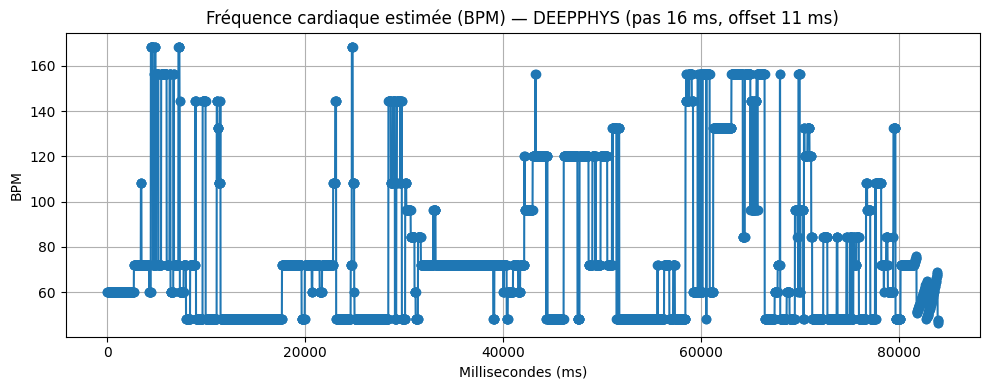

In [4]:
from pathlib import Path
import importlib.util
import torch

# --- 0) Load the saved model ---
MODEL_FILE = "DeepPhysEnhancedReLU.py"  # path to the class
CKPT_DIR = Path("checkpoints")
PT_PATH = CKPT_DIR / "deepphys_enhanced_last.pt"        # ckpt dict (with state_dict)
PTH_PATH = CKPT_DIR / "deepphys_enhanced_weights.pth"    # state_dict only

# Dynamic import of the class
spec = importlib.util.spec_from_file_location("DeepPhysEnhanced", str(MODEL_FILE))
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)
DeepPhysEnhanced = module.DeepPhysEnhanced

# Instantiate + load weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepPhysEnhanced().to(device)

if PT_PATH.exists():
    payload = torch.load(str(PT_PATH), map_location=device)
    state = payload["state_dict"] if isinstance(payload, dict) and "state_dict" in payload else payload
    model.load_state_dict(state, strict=False)
    print(f" Model loaded from: {PT_PATH}")
elif PTH_PATH.exists():
    state = torch.load(str(PTH_PATH), map_location=device)
    model.load_state_dict(state, strict=False)
    print(f" Weights loaded from: {PTH_PATH}")
else:
    raise FileNotFoundError("No checkpoint found in 'checkpoints/'. Train and save the model first.")

model.eval()

# === HR (BPM) sampled every 16 ms (start 11 ms) — DEEPPHYS version ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# --- VIDEO TARGETING: analyze a specific video ---
# Adjust if needed
video_path = "./videos/vid5.avi"  # ← specify your video to test
print(f"BPM analysis (11 ms offset, 16 ms step) on: {video_path}")


def _dominant_bpm(sig, fs, bpm_min=40.0, bpm_max=180.0):
    """Returns the dominant BPM of a segment via FFT (range 40–180 bpm)."""
    sig = np.asarray(sig, dtype=float)
    n = len(sig)
    if n < max(8, int(fs * 2)):
        return np.nan
    sig = sig - sig.mean()
    freqs = np.fft.rfftfreq(n, d=1.0 / float(fs))
    spec = np.abs(np.fft.rfft(sig))
    mask = (freqs >= bpm_min / 60.0) & (freqs <= bpm_max / 60.0)
    if not np.any(mask):
        return np.nan
    idx = np.argmax(spec[mask])
    f = freqs[mask][idx]
    return 60.0 * f


def _per_second_bpm(sig, fs, window_sec=5.0, step_sec=1.0, offset_sec=0.0):
    """BPM at regular steps with a centered sliding window (arbitrary offset + step)."""
    sig = np.asarray(sig, dtype=float)
    T_sec = len(sig) / float(fs)
    if step_sec <= 0:
        raise ValueError("step_sec must be > 0")
    times = offset_sec + np.arange(0.0, max(0.0, T_sec - offset_sec + 1e-12), step_sec)

    out = []
    win_len = int(round(window_sec * fs))
    min_len = int(2 * fs)
    for t in times:
        start = int(max(0, round((t - window_sec / 2.0) * fs)))
        end = int(min(len(sig), start + win_len))
        if end - start < min_len:
            out.append(np.nan)
        else:
            out.append(_dominant_bpm(sig[start:end], fs))
    return np.array(out, dtype=float)


# 1) Get fps
# (read directly from the video)
cap_tmp = cv2.VideoCapture(video_path)
meta_fps = cap_tmp.get(cv2.CAP_PROP_FPS)
cap_tmp.release()
_fs = float(meta_fps) if meta_fps and meta_fps > 0 else 30.0


# 2) Obtain/reconstruct the model signal (DEEPPHYS) using the loaded model
import mediapipe as mp
mp_fd = mp.solutions.face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

cap = cv2.VideoCapture(video_path)
preds_local = []
prev_face = None
ok, frame = cap.read()
while ok:
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    res = mp_fd.process(rgb)
    h, w, _ = frame.shape
    if res.detections:
        d = res.detections[0].location_data.relative_bounding_box
        x0, y0 = int(d.xmin * w), int(d.ymin * h)
        bw, bh = int(d.width * w), int(d.height * h)
        cx, cy = x0 + bw // 2, y0 + bh // 2
        sz = int(1.6 * max(bw, bh))
        x1, y1 = max(0, cx - sz // 2), max(0, cy - sz // 2)
        x2, y2 = min(w, x1 + sz), min(h, y1 + sz)
        face = frame[y1:y2, x1:x2]
    else:
        face = frame

    face = cv2.resize(face, (36, 36)).astype(np.float32) / 255.0

    if prev_face is not None:
        diff = face - prev_face
        green = float(face[:, :, 1].mean())
        pos_map = face[:, :, 0] * 3 - face[:, :, 1] * 2
        pos_val = float(pos_map.mean())

        t_r = torch.tensor(face, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
        t_d = torch.tensor(diff, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
        pg = np.stack([
            np.full((36, 36), pos_val, dtype=np.float32),
            np.full((36, 36), green,   dtype=np.float32)
        ], axis=2)
        t_p = torch.tensor(pg, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

        with torch.no_grad():
            pred = model(t_d, t_r, t_p).item()
        preds_local.append(pred)

    prev_face = face.copy()
    ok, frame = cap.read()

cap.release()

_sig = np.asarray(preds_local, dtype=float)
if _sig.size:
    _sig = _sig - _sig.mean()

# 3) Requested parameters: 11 ms offset and 16 ms step
_offset_ms = 11
_step_ms = 16
_offset_s = _offset_ms / 1000.0
_step_s = _step_ms / 1000.0

# 4) BPM calculation with a centered 5 s window
bpm_per_sec = _per_second_bpm(_sig, _fs, window_sec=5.0, step_sec=_step_s, offset_sec=_offset_s)

# Time axis
secs = _offset_s + np.arange(len(bpm_per_sec)) * _step_s
ms = _offset_ms + np.arange(len(bpm_per_sec)) * _step_ms

# Associated slices (bin = step)
start_frames = np.clip(((ms / 1000.0) * _fs).astype(int), 0, max(0, len(_sig) - 1))
end_frames = np.clip((((ms + _step_ms) / 1000.0) * _fs).astype(int) - 1, 0, max(0, len(_sig) - 1))

# 5) Results table
import pandas as pd

df_fc = pd.DataFrame({
    'milliseconds (ms)': ms,
    'start_frame': start_frames,
    'end_frame': end_frames,
    'bpm': bpm_per_sec,
})

df_fc = df_fc[['milliseconds (ms)', 'start_frame', 'end_frame', 'bpm']]

# Quick display
try:
    display(df_fc.head())
except Exception:
    print(df_fc.head())

# 6) CSV export (DEEPPHYS)
_csv_path = 'resultats_fc_DeepPhysEnhanced.csv'
df_fc.to_csv(_csv_path, index=False)
print(f" Results saved to {_csv_path}")

# 7) Plot
plt.figure(figsize=(10, 4))
plt.plot(ms, bpm_per_sec, marker='o')
plt.title('Estimated heart rate (BPM) — DEEPPHYS (16 ms step, 11 ms offset)')
plt.xlabel('Milliseconds (ms)')
plt.ylabel('BPM')
plt.grid(True)
plt.tight_layout()
plt.show()